# Question 3. Gaussian Discriminant Analysis  [40 pts.]

### A. Theoritical Questions.  [20 pts.]

#### Write a short note about : 

1. Difference between $\textbf{Generative}$ model and $\textbf{Discrimininative}$ model ? 
2. Difference between $\textbf{Linear}$ and $\textbf{Quadratic}$ decision boundaries w.r.t GDA ?
3. Difference between $\textbf{Gaussian Discriminant Analysis}$ and $\textbf{Logistic Regression}$ as a classifier ?
4. Difference between $\textbf{Univariate}$ & $\textbf{Multivariate}$ GDA.


1. Generative vs. Discriminitive models:
  - Generative models learn the probability distributions of the data and can be used to generate new data points. They use the joint probabiliy concept to predict instances of a given feature based on the max liklihood of that feature given the class. Generative models often rely on Naive Bayes theorem which states P(Y|X) = P(Y)P(X|Y) / P(X). Generative models suffer when there are outliers in the data more than discriminitve models.
  - Discriminitve models on the other hand learn class boundaries in the dataset. They try to learn a function that can separate the classes in the dataset. Discriminitive models suffer when data points are wrongly misclassified more that Generative models.

2. Linear vs. Quadratic decision boundaries: 
  - Linear decision boundaries w.r.t. GDA are the straight lines that separate two classes of data points. 
  - Quadratic decision boundaries are appropriate when the classes are not able to be separated with a straight line, but can be separated with a curved line (i.e., a quadratic function).

3. Gaussian Discriminant analysis (GDA) vs. Logistic Regression (LR):
  - Assumptions of multivariate distribution and covariance matrices are required before using Gaussian Discriminant Analysis, but such assumptions are not required for logistic regression.
  - Logistic regression does not make assumptions about the distribution of the features (whereas GDA assumes normal distribution) and therefore LR can model data that includes non-normal features better thean GDA.
  - GDA makes more assumptions about the features than does LR, and when those assumptions are true (i.e., normal distribution), then GDA will fit the data better in theory than LR.
  - GDA requires less datapoints to accurately fit the dataset vs Linear Regression.


4. Univariant GDA vs. multivariate GDA: 
  - Univariate GDA is when there is a single feature with a normal distribution with a mean (mu) and a standard deviation (sigma).
  - Multivariate GDA is where there are multiple features each with a normal distribution. Mu and Sigma are vectors which represent the means and standard deviations (respectively) for the features. The features share a covariance matrix. 

### B. Coding Question. [20 pts.]

Given data set $\textbf{"gaussian_discriminant_analysis.csv"}$ , plot the decison boundry [Linear] using $\textbf{GDA}$ .

The data contains 100 data points [50 for each class].

Note : The implementations must be done from scratch, data manipulation libraries like numpy, pandas etc are allowed.

In [285]:
## TODO : Required imports as neccessary.
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [286]:
## TODO : Import the data as necessary.

data = pd.read_csv("gaussian_discriminant_analysis.csv", header=None)


In [287]:
## To ensure your data is not curropted, run "df.describe" atleast once to be sure,
## below is a representation of how "df.describe" must look like.
print(data.describe())

                0           1           2
count  100.000000  100.000000  100.000000
mean     3.927237    5.027441    0.500000
std      3.137358    3.340557    0.502519
min     -0.651939   -0.552670    0.000000
25%      0.961299    1.870980    0.000000
50%      3.645872    4.503459    0.500000
75%      6.917812    8.144461    1.000000
max      9.811431   11.771933    1.000000


(100, 2)


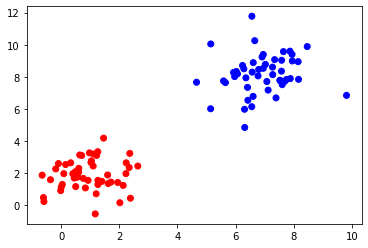

In [361]:
## Manipulate data as neccesary & create a scatter plot using any plotting library [preferably 'matplotlib'].
## Below is how the data must look like.
## Blue : the data with label 0 [positive].
## Red  : the data with label 1 [negative].

## TODO: Your code below.
x = data.iloc[:, :2]
y = data.iloc[:, 2]
colors = {0: "red", 1: "blue"}
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y.map(colors))
print(x.shape)

In [429]:

# Define the GDA class
from numpy import size


class GDA():
    def __init__(self):
        self.classes = None
        self.y_vals = None
        self.features = None
        self.phi   = None
        self.mu0   = None
        self.mu1   = None
        self.sigma = None
        self.linear_discriminants = None

    def train(self, x, y):
        self.classes = np.unique(y)
        self.y_vals = y
        self.features = x
        self.phi   = np.mean(y)
        self.mu0   = np.zeros(x.shape[1]) # vector with an element for each feature
        self.mu1   = np.zeros(x.shape[1]) # vector with an elem3 ent for each feature
        self.sigma = np.zeros(shape=(x.shape[1], x.shape[1]))  # Covariant matrix size = num_features * num_features
        self.linear_discriminants = None

        self.mu0 = np.mean(self.features[self.y_vals.values == 0], axis=0)
        self.mu1 = np.mean(self.features[self.y_vals.values == 1], axis=0)
        # Set n_x for when y==0 and p_x for y==1
        self.n_x = self.features[self.y_vals == 0]
        self.p_x = self.features[self.y_vals == 1]
        
        # Get the covariance matrix "sigma"
        self.sigma = ((self.n_x - self.mu0).T.dot(self.n_x - self.mu0) + (self.p_x - self.mu1).T.dot(self.p_x - self.mu1))/self.features.size


from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
X_train = train.iloc[:, :2]
Y_train = train.iloc[:, 2]

gda = GDA()
gda.train(train.iloc[:,:2], train.iloc[:,2])

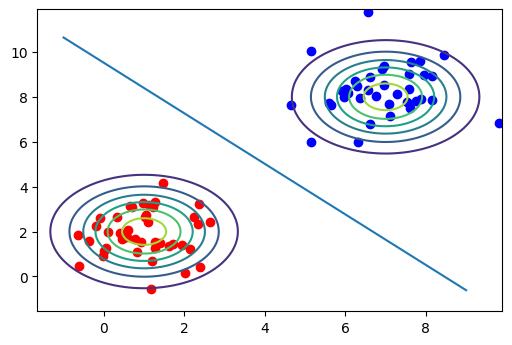

In [451]:
"""
Draw GDA Decision Boundary Along with data points.

Note : The decision line must seperate the data points clearly.
"""

# Draw the plot with training points and separating line
from matplotlib.pyplot import figure


def drawSeparatingLine(gda):
    plt.figure(dpi=100)
    plt.scatter(gda.n_x.iloc[:,0], gda.n_x.iloc[:,1], color="red")
    plt.scatter(gda.p_x.iloc[:,0], gda.p_x.iloc[:,1], color="blue")
    inv_sigma = np.linalg.inv(gda.sigma)
    
    ''' Draw Separating Line '''
    k = (inv_sigma * 2).dot(gda.mu1 - gda.mu0)
    b = (gda.mu1.T).dot(inv_sigma).dot(gda.mu1) - (gda.mu0.T).dot(inv_sigma).dot(gda.mu0) + np.log(gda.phi) - np.log(1-gda.phi)
    # print(b)
    # print(k)
    x1 = np.arange(-1, 10, 1)
    x2 = (b - k[0]*x1)/k[1]
    plt.plot(x1,x2)
 
    ''' Draw Contour '''
    # Make meshgrid for points where y==0
    xmin_n, xmax_n = min(gda.n_x.iloc[:,0]), max(gda.n_x.iloc[:,0])
    xmin_p, xmax_p = min(gda.n_x.iloc[:,1]), max(gda.n_x.iloc[:,1])
    xgrid1 = np.arange(xmin_n-1, xmax_n+1, 0.1)
    ygrid1 = np.arange(xmin_p-1, xmax_p+1, 0.1)
    X1, Y1 = np.meshgrid(xgrid1, ygrid1)
    Z1 = np.exp(-0.35*((X1-1)**2+0.85*(Y1-2)**2)) 
    plt.contour(X1,Y1,Z1)
    
    # Make meshgrid for points where y==1
    xgrid0 = np.arange(4, 10, 0.1)
    ygrid0 = np.arange(5, 12, 0.1)
    X0, Y0 = np.meshgrid(xgrid0, ygrid0)
    Z0 = np.exp(-0.35*((X0-7)**2+0.85*(Y0-8)**2))
    plt.contour(X0,Y0,Z0)

    plt.show()
    
drawSeparatingLine(gda)

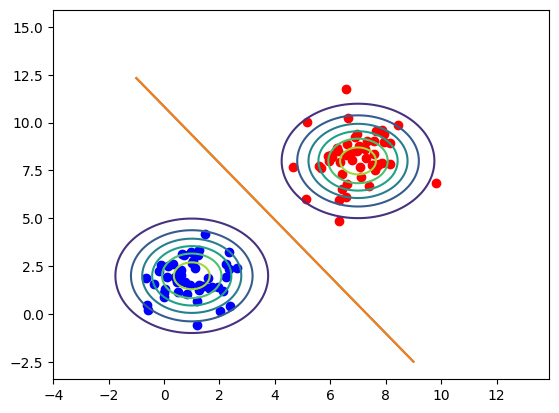

In [ ]:
""" Draw contour Along with GDA Decision Boundary and data points. """


""" A sample plot is given below. """